<a href="https://colab.research.google.com/github/gharis/MachineLearning/blob/master/CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 4.3MB 33.9MB/s 
     |████████████████████████████████| 501kB 46.4MB/s 


In [3]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 2.7MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [10]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [14]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes_name = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

In [16]:
x_train.max()

255

In [0]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
x_test.shape

(10000, 32, 32, 3)

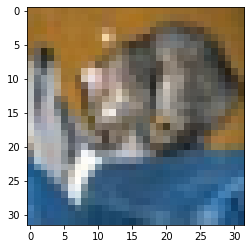

In [22]:
plt.imshow(x_test[0])

In [23]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =[32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metics =['sparse_categorical_accuracy'])


In [40]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 1.3805 - val_loss: 1.0633
Epoch 2/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 1.0633 - val_loss: 0.9773
Epoch 3/10
50000/50000 [==============================] - 216s 4ms/sample - loss: 0.9414 - val_loss: 0.9643
Epoch 4/10
50000/50000 [==============================] - 212s 4ms/sample - loss: 0.8551 - val_loss: 0.9272
Epoch 5/10
50000/50000 [==============================] - 212s 4ms/sample - loss: 0.7855 - val_loss: 0.9023
Epoch 6/10
50000/50000 [==============================] - 213s 4ms/sample - loss: 0.7264 - val_loss: 0.8782
Epoch 7/10
50000/50000 [==============================] - 212s 4ms/sample - loss: 0.6793 - val_loss: 0.9339
Epoch 8/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 0.6374 - val_loss: 0.9227
Epoch 9/10
50000/50000 [==============================] - 216s 4ms/sample - loss: 0.60

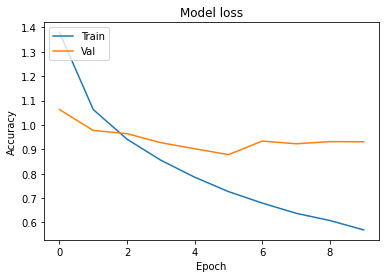

In [43]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train','Val'],loc='upper left')
#plt.show()

#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = model.predict_classes(x_test)
y_pred

array([5, 8, 8, ..., 7, 1, 7])

In [48]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [50]:
mat

array([[722,  30,  21,  25,  10,   4,  15,  13,  95,  65],
       [ 10, 801,   3,   7,   0,   3,   7,   2,  43, 124],
       [ 93,  10, 446,  88, 123,  66, 110,  32,  17,  15],
       [ 27,  12,  38, 552,  65, 145,  84,  33,  21,  23],
       [ 26,   4,  45,  75, 635,  33,  92,  68,  12,  10],
       [ 14,   8,  31, 237,  45, 544,  36,  62,  10,  13],
       [  7,   9,  29,  54,  29,  21, 830,   5,  11,   5],
       [ 18,   6,  20,  46,  51,  55,  10, 752,  13,  29],
       [ 42,  47,   9,  11,   4,   2,   8,   5, 833,  39],
       [ 26,  82,   4,  12,   2,   1,   7,  11,  29, 826]])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8d610a3c8>)

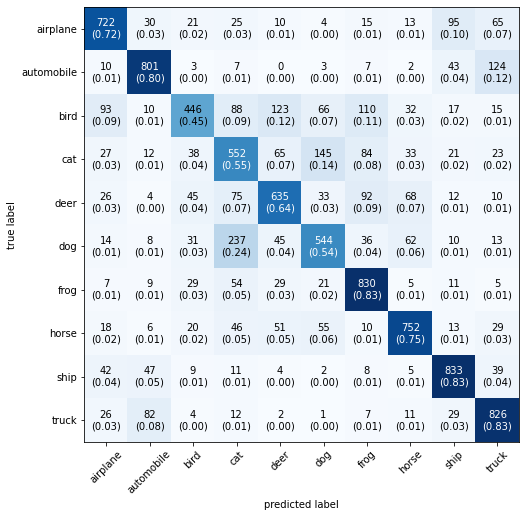

In [53]:
plot_confusion_matrix(mat,figsize=(8,8), class_names=classes_name, show_normed = True)